# 라이브러리

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import sys
import urllib.request
from datetime import datetime, time, timedelta
import string
from tqdm import tqdm
import time as t
import seaborn as sns
from scipy.stats import pearsonr, shapiro, levene, spearmanr, ranksums, ttest_ind
import ast
client_id = "CPVW7YCGr2hf9gEz_kA0"
client_secret = "LzETXT6Tw6"


In [153]:
import matplotlib.font_manager as fm
import matplotlib as mpl

In [149]:
# 설치된 폰트 확인
sys_font = fm.findSystemFonts()
print("sys_font number : {}".format(len(sys_font)))
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print("nanum_font number : {}".format(len(nanum_font))) # 나눔 폰트 없음.

sys_font number : 17
['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetyp

In [150]:

# 나눔 폰트 업로드
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 120493 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [151]:

# 폰트가 정상적으로 설치됨.
sys_font = fm.findSystemFonts()
print("sys_font number : {}".format(len(sys_font)))

nanum_font = [f for f in sys_font if 'Nanum' in f]
print("nanum_font number : {}".format(len(nanum_font)))

sys_font number : 56
nanum_font number : 39


In [154]:
fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정
mpl.rcParams['axes.unicode_minus'] = False # 그래프의 x, y축에 정상적인 - 표시 설정

# 데이터 (meta, rate, dramalist)

In [49]:
meta = pd.read_csv("/content/메타_전처리1.csv")
meta = meta.drop(316)
meta = meta.drop(0)
meta = meta.loc[meta['전체회차'] >= 10].reset_index(drop = True)

rate = pd.read_csv('/content/전체시청률.csv')

In [76]:
# 이하의 분석에서는 10화 이상의 중장편만 살펴보도록 함.
dramalist = meta.loc[meta['전체회차'] >= 10, '작품명'].tolist()

# 함수
비교기준 : 유니클로  
shopping_keyword(startdate, enddate, keyword, catergory = "50000000")  # 50000000은 패션/의류 카테고리   
shopping_gender(startdate, enddate, keyword, category = "50000000")  
shopping_age(startdate, enddate, keyword, category = "50000000")  
plt_df(df)

In [9]:
### 키워드 총량(기준 : 유니클로) ###
def shopping_keyword(startdate, enddate, keyword, catergory = "50000000"):

  url = "https://openapi.naver.com/v1/datalab/shopping/category/keywords"
  data = {
      "startDate": startdate,
      "endDate": enddate,
      "timeUnit": "date",
      "category": catergory,
      "keyword": [
          {"name": "유니클로", "param": [ "유니클로"]},
          {"name": keyword, "param": [keyword]}
      ],
      "device": "mo",
      "gender": "",
      "ages": []
  }

  body = json.dumps(data)

  request = urllib.request.Request(url)
  request.add_header("X-Naver-Client-Id", client_id)
  request.add_header("X-Naver-Client-Secret", client_secret)
  request.add_header("Content-Type","application/json")
  response = urllib.request.urlopen(request, data=body.encode("utf-8"))
  rescode = response.getcode()
  if(rescode==200):
      response_body = response.read()
      response_dict = json.loads(response_body.decode('utf-8'))
      print(response_dict)
  else:
      print("Error Code:" + str(rescode))

  result = json.loads(response_body.decode('utf-8'))
  df = pd.DataFrame()

  # Iterate through each item in the 'results' list
  for item in result['results']:
      item_df = pd.DataFrame(item['data']).set_index('period')
      item_df.columns = [item['title']]

      # Append this DataFrame to the main DataFrame
      df = pd.concat([df, item_df], axis=1)

  df.fillna(0, inplace = True)
  df.reset_index(inplace=True)

  df['period'] = pd.to_datetime(df['period'])
  df.sort_values('period', inplace=True)
  df = df.reset_index(drop = True)


  return df



In [10]:
### 키워드의 성별 비교 ###
def shopping_gender(startdate, enddate, keyword, category = "50000000"):
  url = "https://openapi.naver.com/v1/datalab/shopping/category/keyword/gender"
  data = {
      "startDate": startdate,
      "endDate": enddate,
      "timeUnit": "date",
      "category": "50000000",
      "keyword": keyword,
      "device": "mo",
      "gender": "",
      "ages": []
  }

  body = json.dumps(data)

  request = urllib.request.Request(url)
  request.add_header("X-Naver-Client-Id", client_id)
  request.add_header("X-Naver-Client-Secret", client_secret)
  request.add_header("Content-Type","application/json")
  response = urllib.request.urlopen(request, data=body.encode("utf-8"))
  rescode = response.getcode()
  if(rescode==200):
      response_body = response.read()
      response_dict = json.loads(response_body.decode('utf-8'))
      print(response_dict)
  else:
      print("Error Code:" + str(rescode))


  result = json.loads(response_body.decode('utf-8'))
  df_data = []

  # 결과를 반복하여 각 행에 대한 데이터를 생성합니다.
  for res in result['results']:
      for item in res['data']:
          df_data.append({
              'period': item['period'],
              'ratio': item['ratio'],
              'group': item['group'],
          })

  # 데이터프레임을 생성합니다.
  df = pd.DataFrame(df_data)

  # "group" 열을 이용해서 피벗하여 "male"과 "female"열을 만듭니다.
  df = df.pivot(index='period', columns='group', values='ratio').reset_index()

  # "m"과 "f" 대신에 "male"과 "female"로 열 이름을 변경합니다.
  df.rename(columns={'m': 'male', 'f': 'female'}, inplace=True)

  df.fillna(0, inplace = True)
  df['period'] = pd.to_datetime(df['period'])
  df.sort_values('period', inplace = True)
  df = df.reset_index(drop = True)

  return df



In [11]:
### 키워드의 연령 비교 ###
def shopping_age(startdate, enddate, keyword, category = "50000000"):
  url = "https://openapi.naver.com/v1/datalab/shopping/category/keyword/age"
  data = {
      "startDate": startdate,
      "endDate": enddate,
      "timeUnit": "date",
      "category": category,
      "keyword": keyword,
      "device": "",
      "gender": "",
      "ages": []
  }

  body = json.dumps(data)

  request = urllib.request.Request(url)
  request.add_header("X-Naver-Client-Id", client_id)
  request.add_header("X-Naver-Client-Secret", client_secret)
  request.add_header("Content-Type","application/json")
  response = urllib.request.urlopen(request, data=body.encode("utf-8"))
  rescode = response.getcode()
  if(rescode==200):
      response_body = response.read()
      response_dict = json.loads(response_body.decode('utf-8'))
      print(response_dict)
  else:
      print("Error Code:" + str(rescode))

  # json 풀기
  result = json.loads(response_body.decode('utf-8'))
  df_data = []

  # 각 행 데이터 생성
  for res in result['results']:
      for item in res['data']:
          df_data.append({
              'period': item['period'],
              'ratio': item['ratio'],
              'group': item['group'],
          })

  # 데이터프레임 생성
  df = pd.DataFrame(df_data)

  # "group" 열을 이용해서 피벗하여 연령대별 그룹 만들기
  df = df.pivot(index='period', columns='group', values='ratio').reset_index()
  df.fillna(0, inplace = True)
  df['period'] = pd.to_datetime(df['period'])
  df.sort_values('period', inplace = True)
  df = df.reset_index(drop = True)

  return df




In [12]:
def plt_df(df):
  for a in df.columns[1:]:
    x = df['period']
    plt.plot(x, df[a], label = a)
  plt.legend()
  plt.show()

# 패션의류 카테고리에서의 검색량 확인

In [170]:
# a = shopping_keyword("2019-01-01", "2020-01-01", "유니클로")
# b = shopping_keyword("2020-01-01", "2021-01-01", "유니클로")
# c = shopping_keyword("2021-01-01", "2022-01-01", "유니클로")
# d = shopping_keyword("2022-01-01", "2023-01-01", "유니클로")
# e = shopping_keyword("2023-01-01", "2023-07-21", "유니클로")

# k = [a, b, c, d, e]

{'startDate': '2019-01-01', 'endDate': '2020-01-01', 'timeUnit': 'date', 'results': [{'title': '유니클로', 'keyword': ['유니클로'], 'data': [{'period': '2019-01-01', 'ratio': 19.91178}, {'period': '2019-01-02', 'ratio': 9.82986}, {'period': '2019-01-03', 'ratio': 12.72841}, {'period': '2019-01-04', 'ratio': 12.60239}, {'period': '2019-01-05', 'ratio': 12.47637}, {'period': '2019-01-06', 'ratio': 13.67359}, {'period': '2019-01-07', 'ratio': 12.03528}, {'period': '2019-01-08', 'ratio': 11.21613}, {'period': '2019-01-09', 'ratio': 12.85444}, {'period': '2019-01-10', 'ratio': 11.78323}, {'period': '2019-01-11', 'ratio': 7.30938}, {'period': '2019-01-12', 'ratio': 9.5148}, {'period': '2019-01-13', 'ratio': 10.71203}, {'period': '2019-01-14', 'ratio': 9.5148}, {'period': '2019-01-15', 'ratio': 6.55324}, {'period': '2019-01-16', 'ratio': 8.38059}, {'period': '2019-01-17', 'ratio': 8.75866}, {'period': '2019-01-18', 'ratio': 7.62444}, {'period': '2019-01-19', 'ratio': 8.56962}, {'period': '2019-01-20'

In [171]:
# # 유니클로로 기준
# for argu in range(5):
#   if argu != 0:
#     now = k[argu].copy()
#     x = before.iloc[-1, 1] / now.iloc[0, 1]
#     now.iloc[:,1] = now.iloc[:, 1] * x
#     shop_standard = pd.concat([before.iloc[:-1, :], now])
#     before = shop_standard
#   else:
#     before = k[argu]

# shop_standard = shop_standard.reset_index(drop = True)

In [ ]:
# error_list = []
# for name in dramalist:
#   try:
#     target = meta.loc[meta['작품명'] == name, ['시작일', '종료일']]
#     if target.iloc[0, 1] <= '2023-07-21':
#       table = shopping_keyword(str(target.iloc[0,0])[:10], str(target.iloc[0,1])[:10], name)
#     else:
#       table = shopping_keyword(str(target.iloc[0,0])[:10], '2023-07-21', name)

#     x = float(shop_standard.loc[shop_standard['period'] == table.iloc[0,0], '유니클로'] / table.iloc[0, 1]) # 유니클로가 기준
#     table.iloc[:,[1,2]] = table.iloc[:, [1,2]] * x  # 기준에 따라 정렬
#     table = table.drop('유니클로', axis =1)

#     shop_standard = shop_standard.merge(table, on = 'period', how = 'left')

#   except Exception as e:
#     error_list.append(name)
#     print(name)

In [173]:
# print(len(error_list), error_list)

63 ['최고의 치킨', '해치', '국민 여러분!', '에이틴 2', '녹두꽃', '이몽', '보이스 3 - 공범들의 도시', '아스달 연대기', '조선생존기', '레벨업', '신입사관 구해령', '꽃파당: 조선혼담공작소', '조선로코-녹두전', '나의 나라', '레버리지: 사기조작단', '간택 - 여인들의 전쟁', '터치', '바람과 구름과 비', '낮과 밤', '바람피면 죽는다', '암행어사: 조선비밀수사단', '루카: 더 비기닝', '달이 뜨는 강', '시지프스 : the myth', '괴물', '마우스', '어쩌다 가족', '나빌레라', '보쌈 - 운명을 훔치다', '마인:MINE', '멀리서 보면 푸른 봄', '보이스 4', '홍천기', '연모', '아이돌: 더 쿠데타', '옷소매 붉은 끝동', '태종 이방원', '꽃 피면 달 생각하고', '기상청 사람들: 사내연애 잔혹사 편', '킬힐', '돼지의 왕', '별똥별', '지금부터, 쇼타임!', '구필수는 없다', '이브', '왜 오수재인가?', '클리닝 업', '아다마스', '조선 정신과 의사 유세풍', '블라인드', '디 엠파이어 : 법의 제국', '금혼령, 조선 혼인 금지령', '트롤리', '미씽: 그들이 있었다 2', '조선 정신과 의사 유세풍 2', '청춘월담', '오아시스', '판도라: 조작된 낙원', '조선변호사', '스틸러 : 일곱 개의 조선통보', '넘버스 : 빌딩숲의 감시자들', '악귀', '가슴이 뛴다']


In [174]:
# modifies = ['최고의치킨', '해치', '국민여러분', '에이틴', '녹두꽃', '이몽', '보이스3', '아스달연대기', '조선생존기', '레벨업', '신입사관구해령', '꽃파당',
#             '녹두전', '나의 나라', '레버리지', '간택', '터치', '바람과구름과비', '낮과밤', '바람피면 죽는다', '암행어사 조선비밀수사단', '루카', '달이 뜨는 강', '시지프스', '괴물',
#             '마우스', '어쩌다가족', '나빌레라', '보쌈', '마인', '멀리서보면푸른봄', '보이스4', '홍천기', '연모', '아이돌 더 쿠데타', '옷소매붉은 끝동', '태종이방원', '꽃피면달생각하고',
#             '기상청 사람들', '킬힐', '돼지의왕', '별똥별', '지금부터 쇼타임', '구필수는 없다', '이브','왜 오수재인가', '클리닝업', '아다마스', '조선정신과의사유세풍', '블라인드', '디엠파이어',
#             '금혼령', '트롤리', '미씽', '조선 정신과의사 유세풍', '청춘월담', '오아시스', '판도라', '조선변호사', '스틸러',  '넘버스',
#             '악귀','가슴이 뛴다']
# len(modifies)

63

In [ ]:
# error_list_2 = []
# for i in range(len(error_list)):
#   try:
#     target = meta.loc[meta['작품명'] == error_list[i], ['시작일', '종료일']]                          # 시간지정에는 error_list
#     if target.iloc[0, 1] <= '2023-07-21':
#       table = shopping_keyword(str(target.iloc[0,0])[:10], str(target.iloc[0,1])[:10], modifies[i])   # 검색에는 modifies
#     else:
#       table = shopping_keyword(str(target.iloc[0,0])[:10], '2023-07-21', modifies[i])

#     # 이전의 for문과의 차이 : col 이름 바꿔주기
#     table = table.rename(columns = {modifies[i] : error_list[i]})
#     x = float(shop_standard.loc[shop_standard['period'] == table.iloc[0,0], '유니클로'] / table.iloc[0, 1]) # 유니클로가 기준
#     table.iloc[:,[1,2]] = table.iloc[:, [1,2]] * x  # 기준에 따라 정렬
#     table = table.drop('유니클로', axis =1)

#     shop_standard = shop_standard.merge(table, on = 'period', how = 'left')

#   except Exception as e:
#     error_list_2.append(error_list[i])
#     print(error_list[i])

In [180]:
# shop_standard.to_csv('shops.csv', index= False, encoding = 'utf-8-sig')
shops = pd.read_csv('/content/shops.csv')

In [240]:
error_list_2 = ['최고의 치킨',
 '해치',
 '녹두꽃',
 '이몽',
 '아스달 연대기',
 '조선생존기',
 '레벨업',
 '신입사관 구해령',
 '꽃파당: 조선혼담공작소',
 '조선로코-녹두전',
 '나의 나라',
 '간택 - 여인들의 전쟁',
 '터치',
 '바람과 구름과 비',
 '낮과 밤',
 '바람피면 죽는다',
 '암행어사: 조선비밀수사단',
 '루카: 더 비기닝',
 '달이 뜨는 강',
 '괴물',
 '마우스',
 '어쩌다 가족',
 '나빌레라',
 '보쌈 - 운명을 훔치다',
 '멀리서 보면 푸른 봄',
 '보이스 4',
 '홍천기',
 '연모',
 '옷소매 붉은 끝동',
 '태종 이방원',
 '꽃 피면 달 생각하고',
 '킬힐',
 '돼지의 왕',
 '별똥별',
 '구필수는 없다',
 '이브',
 '클리닝 업',
 '아다마스',
 '조선 정신과 의사 유세풍',
 '블라인드',
 '트롤리',
 '미씽: 그들이 있었다 2',
 '조선 정신과 의사 유세풍 2',
 '청춘월담',
 '오아시스',
 '조선변호사',
 '악귀',
 '가슴이 뛴다']

In [241]:
errors = pd.DataFrame(error_list_2, columns = ['index'])

In [269]:
mean_shops = shops.iloc[:, 2:].mean()
mean_shops = pd.DataFrame(mean_shops, columns = ['mean of shops']).reset_index()
mean_shops = pd.concat([mean_shops, errors]).reset_index(drop = True).fillna(0)

# 시청률 : avg_rate

In [77]:
avg_rate = rate.loc[rate['작품명'].isin(dramalist)].groupby('작품명').mean().reset_index()
avg_rate = avg_rate.iloc[:,:2]

<ipython-input-77-6da194019141>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rate = rate.loc[rate['작품명'].isin(dramalist)].groupby('작품명').mean().reset_index()


# 일반 검색량 : mean_searchs

## 검색량 찾기 함수
def df_search(keyword, details, stardate, enddate, ages, gender, device = 'mo', timeunit = 'date'):  
keyword = ['멜로가체질', '천우희', '패션'] # keyword list  
details = [['멜로가체질'], ['천우희'], ['패션', '옷', '블라우스']] # 세부검색  
startdate = '2019-01-01' # 시작날짜 형식:2022-01-03  
enddate = '2020-01-01' # 종료날짜  
ages = ['1','2','3'] # 연령대 1:0-12, 2:13-18, 3:19-24, 4:25-29, 5:30-34, 6:35-39, 7:40-44, 8:45-49, 9:50-54, 10:55-59, 11:60- 미입력시 전체  
gender = 'f' # 성별 m:남, f:여 미입력시 전체  
device = 'pc' # 검색도구 pc:pc, mo:모바일 미입력시 전체  
timeunit = 'date' # 시간단위 date:일간, week:주간, month:월간  

In [33]:
def df_search(keyword, details, startdate, enddate, ages, gender, device = 'mo', timeunit = 'date'):
  url = "https://openapi.naver.com/v1/datalab/search";
  body = "{\"startDate\":\"2017-01-01\",\"endDate\":\"2017-04-30\",\"timeUnit\":\"month\",\"keywordGroups\":[{\"groupName\":\"한글\",\"keywords\":[\"한글\",\"korean\"]},{\"groupName\":\"영어\",\"keywords\":[\"영어\",\"english\"]}],\"device\":\"pc\",\"ages\":[\"1\",\"2\"],\"gender\":\"f\"}";
  body_json = json.loads(body)
  body_json['startDate'] = startdate
  body_json['endDate'] = enddate
  body_json['timeUnit'] = timeunit
  body_json['device'] = device
  if ages != '':
    body_json['ages'] = ages
  else:
    body_json['ages'] = ['1','2','3', '4','5','6','7', '8', '9', '10', '11']
  body_json['gender'] = gender

  body_json['keywordGroups'] = []
  for i in range(len(keyword)):
    body_json['keywordGroups'].append( {'groupName': f'{keyword[i]}', 'keywords': details[i]} )
  body = json.dumps(body_json, ensure_ascii=False)


  request = urllib.request.Request(url)
  request.add_header("X-Naver-Client-Id",client_id)
  request.add_header("X-Naver-Client-Secret",client_secret)
  request.add_header("Content-Type","application/json")
  response = urllib.request.urlopen(request, data=body.encode("utf-8"))
  rescode = response.getcode()
  if(rescode==200):
      response_body = response.read()
      response_data = response_body.decode('utf-8')
  else:
      print("Error Code:" + rescode)

  result = json.loads(response_data)
  df = pd.DataFrame()

  # Iterate through each item in the 'results' list
  for item in result['results']:
      item_df = pd.DataFrame(item['data']).set_index('period')
      item_df.columns = [item['title']]

      # Append this DataFrame to the main DataFrame
      df = pd.concat([df, item_df], axis=1)

  df.fillna(0, inplace = True)
  df.reset_index(inplace=True)

  df['period'] = pd.to_datetime(df['period'])
  df.sort_values('period', inplace=True)
  df = df.reset_index(drop = True)

  return df

In [34]:
def modify_detail(search_word, add_word, add = True):
  if add == True:
    for sub_list in detail_list:
      if search_word in sub_list:
        index2change = detail_list.index(sub_list)
        print(index2change, detail_list[index2change])
        detail_list[index2change].append(add_word)
        print(detail_list[index2change])
  else:
     for sub_list in detail_list:
      if search_word in sub_list:
        index2change = detail_list.index(sub_list)
        print(index2change, detail_list[index2change])


In [35]:
def return_search_info(title):
  k = meta.loc[meta['작품명'] == title]
  keyword = [title, '기준']
  startdate = k.iloc[0, 5][:10]
  enddate = k.iloc[0, 6][:10]
  return keyword, startdate, enddate

## 전처리 (searchs 만들기)

In [51]:
translator = str.maketrans('', '', f'{string.punctuation} ')
# 특수문자 지우고, : 이나 -로 부제 달린 것들은 앞에 것만 반영
x_list = [[x, x.split(':')[0], x.split('-')[0], x.translate(translator)] for x in dramalist]

# 동일한 인자는 지우기
detail_list = []
for sub_list in x_list:
    detail_list.append(list(set(sub_list)))
    detail_list_2 = detail_list.copy()
print(detail_list_2)

[['최고의 치킨', '최고의치킨'], ['동네변호사 조들호 2: 죄와 벌', '동네변호사 조들호 2', '동네변호사조들호2죄와벌'], ['왕이된남자', '왕이 된 남자'], ['왜그래풍상씨', '왜그래 풍상씨'], ['용왕님 보우하사', '용왕님보우하사'], ['봄이오나봄', '봄이 오나 봄'], ['로맨스는별책부록', '로맨스는 별책부록'], ['바벨'], ['진심이닿다', '진심이 닿다'], ['리갈하이', '리갈 하이'], ['막돼먹은 영애씨 17', '막돼먹은영애씨17'], ['눈이 부시게', '눈이부시게'], ['아이템'], ['해치'], ['열혈사제'], ['슬플때사랑한다', '슬플 때 사랑한다'], ['빅이슈'], ['빙의'], ['사이코메트리 그녀석', '사이코메트리그녀석'], ['닥터프리즈너', '닥터 프리즈너'], ['킬잇'], ['자백'], ['으라차차 와이키키 2', '으라차차와이키키2'], ['더뱅커', '더 뱅커'], ['국민여러분', '국민 여러분!'], ['아름다운 세상', '아름다운세상'], ['특별근로감독관 조장풍', '특별근로감독관조장풍'], ['회사가기싫어', '회사 가기 싫어'], ['그녀의 사생활', '그녀의사생활'], ['에이틴2', '에이틴 2'], ['녹두꽃'], ['여름아부탁해', '여름아 부탁해'], ['이몽'], ['어비스'], ['초면에 사랑합니다', '초면에사랑합니다'], ['구해줘 2', '구해줘2'], ['보이스 3 - 공범들의 도시', '보이스 3 ', '보이스3공범들의도시'], ['절대 그이', '절대그이'], ['봄밤'], ['단하나의사랑', '단, 하나의 사랑'], ['바람이분다', '바람이 분다'], ['아스달 연대기', '아스달연대기'], ['검법남녀 2', '검법남녀2'], ['퍼퓸'], ['검색어를 입력하세요 WWW', '검색어를입력하세요WWW'], ['조선생존기'], ['보좌관'], ['60일, 지정생존자', '60일지정생존자'], ['평일 오후 세시의 연인', '평일오후세시의연인'],

In [52]:
modify_detail('동네변호사 조들호 2', '동네변호사 조들호')
modify_detail('검색어를 입력하세요 WWW', '검블유')
modify_detail('싸이코패스 다이어리', '싸패다')
modify_detail('왜 오수재인가?', '왜오수재인가')
modify_detail('금혼령, 조선 혼인 금지령', '금혼령')
modify_detail('낭만닥터 김사부 3', '김사부 3')
modify_detail('평일오후세시의연인', '평일오후3시의연인')
modify_detail('어쩌다발견한하루', '어발하')
modify_detail('경이로운소문', '경소문')
modify_detail('펜트하우스', '펜하')
modify_detail('펜트하우스2', '펜하')
modify_detail('펜트하우스3', '펜하')
modify_detail('펜트하우스2', '펜하2')
modify_detail('펜트하우스3', '펜하3')
modify_detail('펜트하우스2', '펜트하우스')
modify_detail('펜트하우스3', '펜트하우스')
modify_detail('어느날우리집현관으로문으로멸망이들어왔다', '어느날멸망이')
modify_detail('이번생도잘부탁해', '이생잘')
modify_detail('막돼먹은영애씨17', '막돼먹은영애씨')


modify_detail('조선로코', 'ㅇㄹ', add = False)
modify_detail('보쌈 ', 'ㅇㄹ', add = False)

1 ['동네변호사 조들호 2: 죄와 벌', '동네변호사 조들호 2', '동네변호사조들호2죄와벌']
['동네변호사 조들호 2: 죄와 벌', '동네변호사 조들호 2', '동네변호사조들호2죄와벌', '동네변호사 조들호']
44 ['검색어를 입력하세요 WWW', '검색어를입력하세요WWW']
['검색어를 입력하세요 WWW', '검색어를입력하세요WWW', '검블유']
84 ['싸이코패스 다이어리', '싸이코패스다이어리']
['싸이코패스 다이어리', '싸이코패스다이어리', '싸패다']
277 ['왜오수재인가', '왜 오수재인가?']
['왜오수재인가', '왜 오수재인가?', '왜오수재인가']
313 ['금혼령, 조선 혼인 금지령', '금혼령조선혼인금지령']
['금혼령, 조선 혼인 금지령', '금혼령조선혼인금지령', '금혼령']
343 ['낭만닥터김사부3', '낭만닥터 김사부 3']
['낭만닥터김사부3', '낭만닥터 김사부 3', '김사부 3']
48 ['평일 오후 세시의 연인', '평일오후세시의연인']
['평일 오후 세시의 연인', '평일오후세시의연인', '평일오후3시의연인']
75 ['어쩌다 발견한 하루', '어쩌다발견한하루']
['어쩌다 발견한 하루', '어쩌다발견한하루', '어발하']
163 ['경이로운소문', '경이로운 소문']
['경이로운소문', '경이로운 소문', '경소문']
158 ['펜트하우스']
['펜트하우스', '펜하']
178 ['펜트하우스 2', '펜트하우스2']
['펜트하우스 2', '펜트하우스2', '펜하']
200 ['펜트하우스 3', '펜트하우스3']
['펜트하우스 3', '펜트하우스3', '펜하']
178 ['펜트하우스 2', '펜트하우스2', '펜하']
['펜트하우스 2', '펜트하우스2', '펜하', '펜하2']
200 ['펜트하우스 3', '펜트하우스3', '펜하']
['펜트하우스 3', '펜트하우스3', '펜하', '펜하3']
178 ['펜트하우스 2', '펜트하우스2', '펜하', '펜하2']
['펜트하우스 2', '펜트하우스2', '

In [53]:
detail_list[74] = ['조선로코 녹두전', '녹두전', '조선로코-녹두전']
detail_list[193] = ['보쌈 - 운명을 훔치다', '보쌈 운명을 훔치다']

In [54]:
# # 비교 기준과 병합용 table
# standard = df_search(['기준'], [['구글']], '2019-01-01', '2023-07-21', ages = '', gender = '')
# whole_join = standard.copy().set_index('period')


# # dramalist, detail_list 는 10화 이상의 작품명들과 그것들의 세부 검색어 집합
# for a in tqdm(range(len(dramalist))):
#   # df_search의 인자
#   title = dramalist[a]
#   details = [detail_list[a], ['구글']]
#   ages = ''
#   gender = ''
#   keyword, startdate, enddate = return_search_info(title)
#   # 7월까지로 데이터 제한
#   if enddate < '2023-07-21':
#     pass
#   else:
#     enddate = '2023-07-21'

#   # 비교가 가능하도록 조정
#   t.sleep(0.1)
#   k = df_search(keyword, details, startdate, enddate, ages, gender)
#   value = standard.loc[standard['period'] == k.iloc[0,0], '기준'] / k.iloc[0,2]
#   value = value.values[0]

#   k.iloc[:, 1] = k.iloc[:, 1]*value

#   whole_join = whole_join.join(k.iloc[:, :2].set_index('period'))


100%|██████████| 355/355 [06:07<00:00,  1.03s/it]


In [63]:
# whole_join.reset_index().to_csv('/content/searchs.csv', index = False)

## 분석

In [64]:
searchs = pd.read_csv('/content/searchs.csv')

In [88]:
mean_searchs = searchs.iloc[:, 2:].mean()
mean_searchs = pd.DataFrame(mean_searchs, columns = ['mean of searchs']).reset_index()

# 상관관계 분석

In [310]:
table = avg_rate.merge(mean_searchs, left_on= '작품명', right_on = 'index', how = 'left').drop('index', axis = 1)
table = table.merge(mean_shops, left_on= '작품명', right_on = 'index', how = 'left').drop('index', axis = 1)
table['mean of shops'] = np.log10(table['mean of shops'] + 0.000001)
# 작품명 / 시청률 / mean of searchs / mean of shops

## 시청률 - 일반 검색 상관관계

<ipython-input-311-c44d87039d46>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(x='시청률', y='mean of searchs', data=table, palette='viridis')


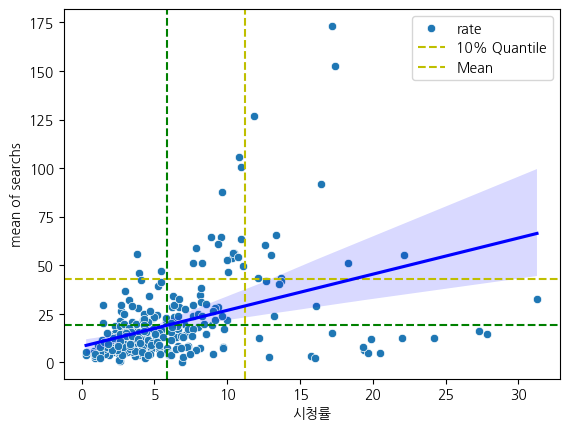

In [311]:
# 각 열의 10% 수준에 해당하는 값과 평균 계산
quantile_10 = table[['시청률', 'mean of searchs']].quantile(0.9)
mean = table[['시청률', 'mean of searchs']].mean()

ax = sns.scatterplot(x='시청률', y='mean of searchs', data=table, palette='viridis')

# 각 열의 10% 수준에 해당하는 선 그리기
ax.axvline(x=quantile_10['시청률'], color='y', linestyle='--')
ax.axhline(y=quantile_10['mean of searchs'], color='y', linestyle='--')

# 각 열의 평균에 해당하는 선 그리기
ax.axvline(x=mean['시청률'], color='g', linestyle='--')
ax.axhline(y=mean['mean of searchs'], color='g', linestyle='--')

# 회귀선 추가하기
sns.regplot(x='시청률', y='mean of searchs', data=table, scatter=False, ax=ax, color='b')

# 범례 추가. 여기서 범례 레이블을 지정합니다.
ax.legend(labels=['rate', '10% Quantile', 'Mean'])

plt.show()


In [312]:
x = table['시청률']
y = table['mean of searchs']

# 시청률에 대한 정규성 검정
stat, p_value = shapiro(x)
print('시청률 - Statistics=%.3f, p=%.3f' % (stat, p_value))

# searchs에 대한 정규성 검정
stat, p_value = shapiro(y)
print('Searchs - Statistics=%.3f, p=%.3f' % (stat, p_value))
### 두 경우 모두 정규성 만족 X ###

시청률 - Statistics=0.786, p=0.000
Searchs - Statistics=0.654, p=0.000


In [313]:
### 상관계수 검정 ###
# 피어슨 상관계수 분석
correlation, p_value = pearsonr(x, y)

print("Pearson")
print("Correlation:", correlation)
print("P-value:", p_value)

# 스피어맨 상관계수 분석
rho, p_value = spearmanr(x, y)
print("Spearman")
print('Spearman correlation: %.3f' % rho)
print('p-value: %.3f' % p_value) # 둘 모두 p.value가 충분히 작으면 유의

Pearson
Correlation: 0.42354590174813583
P-value: 6.995452897338311e-15
Spearman
Spearman correlation: 0.482
p-value: 0.000


## 시청률 - 패션 검색 상관관계

<ipython-input-314-7254f1d62fca>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(x='mean of shops', y='시청률', data=table, palette='viridis')


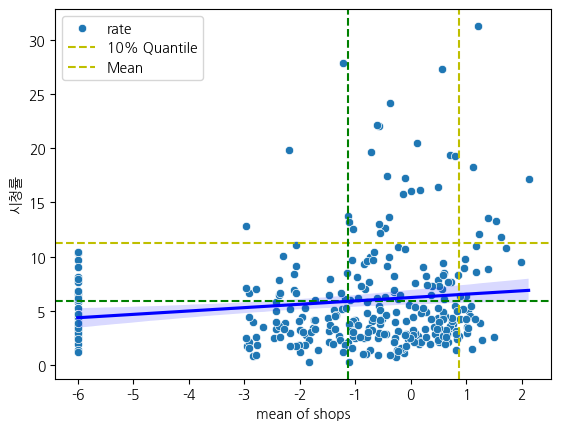

In [314]:
# 각 열의 10% 수준에 해당하는 값과 평균 계산
quantile_10 = table[['mean of shops', '시청률']].quantile(0.9)
mean = table[['mean of shops', '시청률']].mean()

ax = sns.scatterplot(x='mean of shops', y='시청률', data=table, palette='viridis')

# 각 열의 10% 수준에 해당하는 선 그리기
ax.axvline(x=quantile_10['mean of shops'], color='y', linestyle='--')
ax.axhline(y=quantile_10['시청률'], color='y', linestyle='--')

# 각 열의 평균에 해당하는 선 그리기
ax.axvline(x=mean['mean of shops'], color='g', linestyle='--')
ax.axhline(y=mean['시청률'], color='g', linestyle='--')

# 회귀선 추가하기
sns.regplot(x='mean of shops', y='시청률', data=table, scatter=False, ax=ax, color='b')

# 범례 추가. 여기서 범례 레이블을 지정합니다.
ax.legend(labels=['rate', '10% Quantile', 'Mean'])

plt.show()


In [315]:
x = table['시청률']
y = table['mean of shops']

# 시청률에 대한 정규성 검정
stat, p_value = shapiro(x)
print('시청률 - Statistics=%.3f, p=%.3f' % (stat, p_value))

# searchs에 대한 정규성 검정
stat, p_value = shapiro(y)
print('Searchs - Statistics=%.3f, p=%.3f' % (stat, p_value))
### 두 경우 모두 정규성 만족 X ###

시청률 - Statistics=0.786, p=0.000
Searchs - Statistics=0.847, p=0.000


In [316]:
### 상관계수 검정 ###
# 피어슨 상관계수 분석
correlation, p_value = pearsonr(x, y)

print("Pearson")
print("Correlation:", correlation)
print("P-value:", p_value)

# 스피어맨 상관계수 분석
rho, p_value = spearmanr(x, y)
print("Spearman")
print('Spearman correlation: %.3f' % rho)
print('p-value: %.3f' % p_value) # 둘 모두 p.value가 충분히 작으면 유의

Pearson
Correlation: 0.13306845333839895
P-value: 0.0192803513961489
Spearman
Spearman correlation: 0.113
p-value: 0.048


## 일반검색 - 패션 검색 상관관계

<ipython-input-317-e81ef3392f0e>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(x='mean of shops', y='mean of searchs', data=table, palette='viridis')


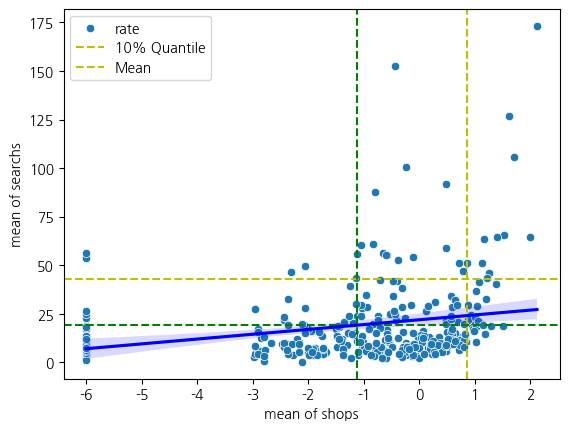

In [317]:
# 각 열의 10% 수준에 해당하는 값과 평균 계산
quantile_10 = table[['mean of shops', 'mean of searchs']].quantile(0.9)
mean = table[['mean of shops', 'mean of searchs']].mean()

ax = sns.scatterplot(x='mean of shops', y='mean of searchs', data=table, palette='viridis')

# 각 열의 10% 수준에 해당하는 선 그리기
ax.axvline(x=quantile_10['mean of shops'], color='y', linestyle='--')
ax.axhline(y=quantile_10['mean of searchs'], color='y', linestyle='--')

# 각 열의 평균에 해당하는 선 그리기
ax.axvline(x=mean['mean of shops'], color='g', linestyle='--')
ax.axhline(y=mean['mean of searchs'], color='g', linestyle='--')

# 회귀선 추가하기
sns.regplot(x='mean of shops', y='mean of searchs', data=table, scatter=False, ax=ax, color='b')

# 범례 추가. 여기서 범례 레이블을 지정합니다.
ax.legend(labels=['rate', '10% Quantile', 'Mean'])

plt.show()


In [318]:
x = table['mean of shops']
y = table['mean of searchs']

# 시청률에 대한 정규성 검정
stat, p_value = shapiro(x)
print('시청률 - Statistics=%.3f, p=%.3f' % (stat, p_value))

# searchs에 대한 정규성 검정
stat, p_value = shapiro(y)
print('Searchs - Statistics=%.3f, p=%.3f' % (stat, p_value))
### 두 경우 모두 정규성 만족 X ###

시청률 - Statistics=0.847, p=0.000
Searchs - Statistics=0.654, p=0.000


In [319]:
### 상관계수 검정 ###
# 피어슨 상관계수 분석
correlation, p_value = pearsonr(x, y)

print("Pearson")
print("Correlation:", correlation)
print("P-value:", p_value)

# 스피어맨 상관계수 분석
rho, p_value = spearmanr(x, y)
print("Spearman")
print('Spearman correlation: %.3f' % rho)
print('p-value: %.3f' % p_value) # 둘 모두 p.value가 충분히 작으면 유의

Pearson
Correlation: 0.24212289313810634
P-value: 1.6844084439267654e-05
Spearman
Spearman correlation: 0.316
p-value: 0.000


# OTT 효과

In [320]:
netflix = ['동백꽃 필 무렵', '봄밤', '신입사관 구해령', '배가본드', '보좌관', '나의 나라', '초콜릿', '로맨스는 별책부록', '어비스',
           '아스달 연대기', '60일, 지정생존자', '사랑의 불시착', '빙의', '모두의 거짓말', '도도솔솔라라솔', '하이에나',
           '더 킹 : 영원의 군주', '이태원 클라쓰', '쌍갑포차', '우리, 사랑했을까', '사생활', '런 온', '하이바이, 마마!',
           '청춘기록', '사이코지만 괜찮아', '슬기로운 의사생활', '스타트업', '비밀의 숲 2', '루갈', '경이로운 소문',
           '도시남녀의 사랑법', '아름다웠던 우리에게', '안녕? 나야!', '연모', '라켓소년단', '그 해 우리는', '시지프스 : the myth',
           '로스쿨', '알고있지만', '너를 닮은 사람', '구경이', '결혼작사 이혼작곡', '결혼작사 이혼작곡 2', '나빌레라', '빈센조',
           '마인:MINE', '슬기로운 의사생활2', '너는 나의 봄', '갯마을 차차차', '불가살', '이 구역의 미친 X', '미남당',
           '내일', '사내맞선', '트롤리', '네가 빠진 세계', '기상청 사람들: 사내연애 잔혹사 편', '서른, 아홉','그린마더스 클럽',
           '나의 해방일지', '재벌집 막내아들', '사랑의 이해', '결혼작사 이혼작곡 3', '빨간풍선', '스물다섯 스물하나',
           '우리들의 블루스', '환혼', '작은 아씨들', '슈룹', '연예인 매니저로 살아남기', '환혼 빛과 그림자',
           '결혼백서', '어쩌다 전원일기', '구필수는 없다', '이상한 변호사 우영우', '사장님을 잠금해제', '진짜가 나타났다!',
           '신성한, 이혼', '닥터 차정숙', '나쁜 엄마', '킹더랜드', '일타 스캔들', '이번 생도 잘 부탁해', '마당이 있는 집'
           ]
# len(netflix)
# ex_list = set(dramalist)
# result = [item for item in netflix if item not in ex_list]
# result

table['ott'] = 0
table.loc[table['작품명'].isin(netflix), 'ott'] = 1

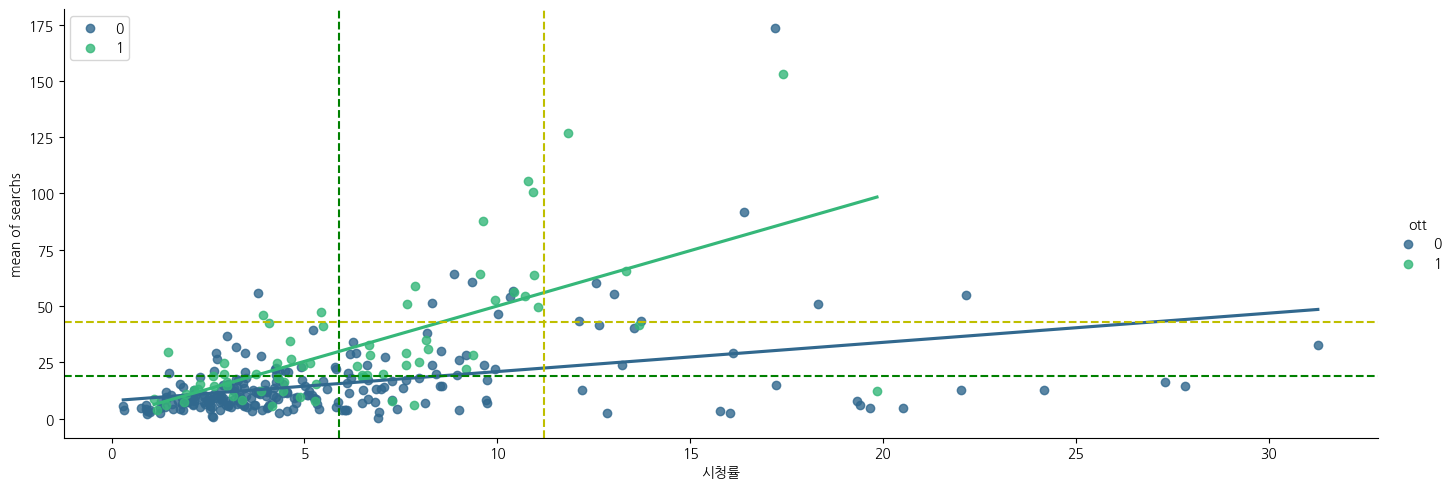

In [325]:
### 시청률 - searchs ###
# 각 열의 10% 수준에 해당하는 값과 평균 계산
quantile_10 = table[['시청률', 'mean of searchs']].quantile(0.9)
mean = table[['시청률', 'mean of searchs']].mean()

# hue에 따른 회귀선 그리기
lm = sns.lmplot(x='시청률', y='mean of searchs', hue='ott', data=table, palette='viridis', height=5, aspect=14/5, ci = None)

# 각 열의 10% 수준에 해당하는 선 그리기
lm.ax.axvline(x=quantile_10['시청률'], color='y', linestyle='--')
lm.ax.axhline(y=quantile_10['mean of searchs'], color='y', linestyle='--')

# 각 열의 평균에 해당하는 선 그리기
lm.ax.axvline(x=mean['시청률'], color='g', linestyle='--')
lm.ax.axhline(y=mean['mean of searchs'], color='g', linestyle='--')


plt.legend(loc='upper left')
plt.show()


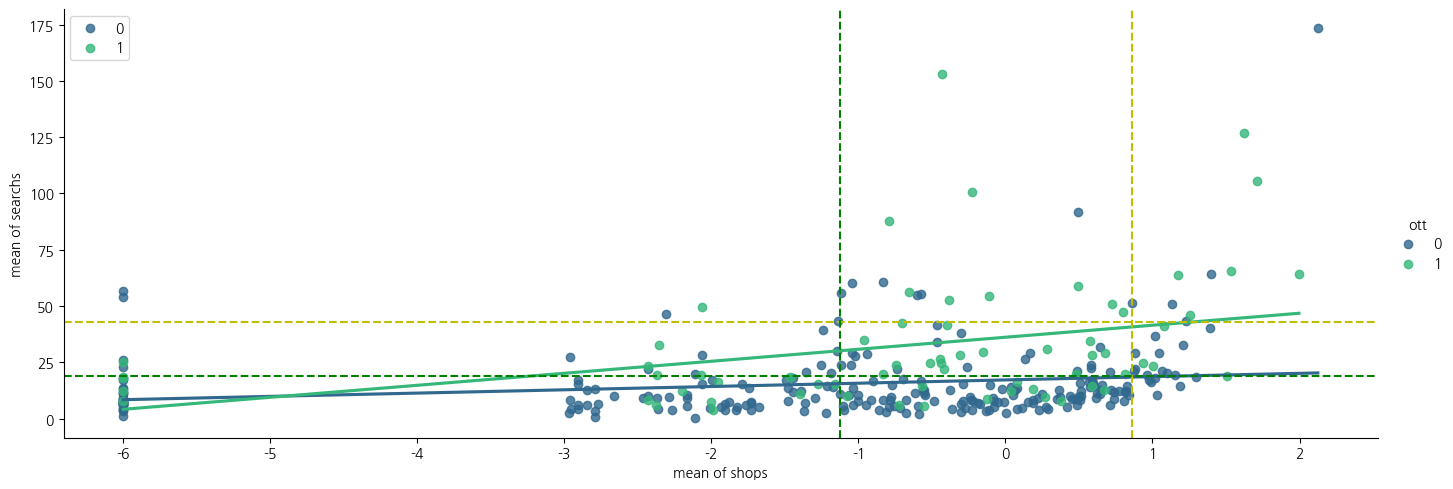

In [326]:
### shops - searachs ###
# 각 열의 10% 수준에 해당하는 값과 평균 계산
quantile_10 = table[['mean of shops', 'mean of searchs']].quantile(0.9)
mean = table[['mean of shops', 'mean of searchs']].mean()

# hue에 따른 회귀선 그리기
lm = sns.lmplot(x='mean of shops', y='mean of searchs', hue='ott', data=table, palette='viridis', height=5, aspect=14/5, ci = None)

# 각 열의 10% 수준에 해당하는 선 그리기
lm.ax.axvline(x=quantile_10['mean of shops'], color='y', linestyle='--')
lm.ax.axhline(y=quantile_10['mean of searchs'], color='y', linestyle='--')

# 각 열의 평균에 해당하는 선 그리기
lm.ax.axvline(x=mean['mean of shops'], color='g', linestyle='--')
lm.ax.axhline(y=mean['mean of searchs'], color='g', linestyle='--')


plt.legend(loc='upper left')
plt.show()


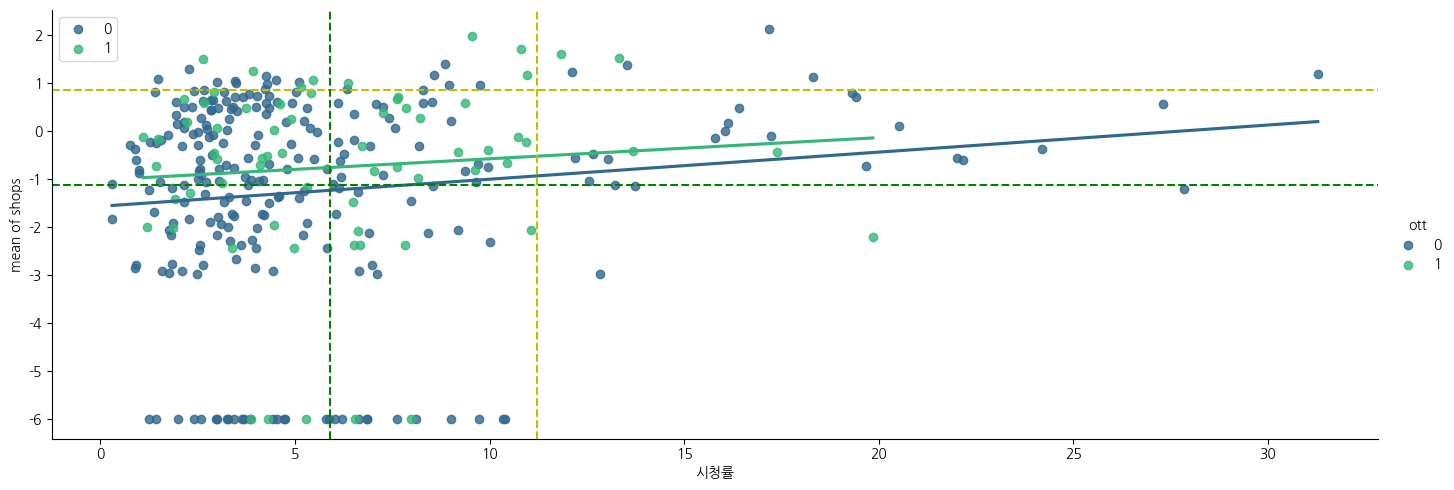

In [327]:
### 시청률 - shops ###
# 각 열의 10% 수준에 해당하는 값과 평균 계산
quantile_10 = table[['시청률', 'mean of shops']].quantile(0.9)
mean = table[['시청률', 'mean of shops']].mean()

# hue에 따른 회귀선 그리기
lm = sns.lmplot(x='시청률', y='mean of shops', hue='ott', data=table, palette='viridis', height=5, aspect=14/5, ci = None)

# 각 열의 10% 수준에 해당하는 선 그리기
lm.ax.axvline(x=quantile_10['시청률'], color='y', linestyle='--')
lm.ax.axhline(y=quantile_10['mean of shops'], color='y', linestyle='--')

# 각 열의 평균에 해당하는 선 그리기
lm.ax.axvline(x=mean['시청률'], color='g', linestyle='--')
lm.ax.axhline(y=mean['mean of shops'], color='g', linestyle='--')


plt.legend(loc='upper left')
plt.show()


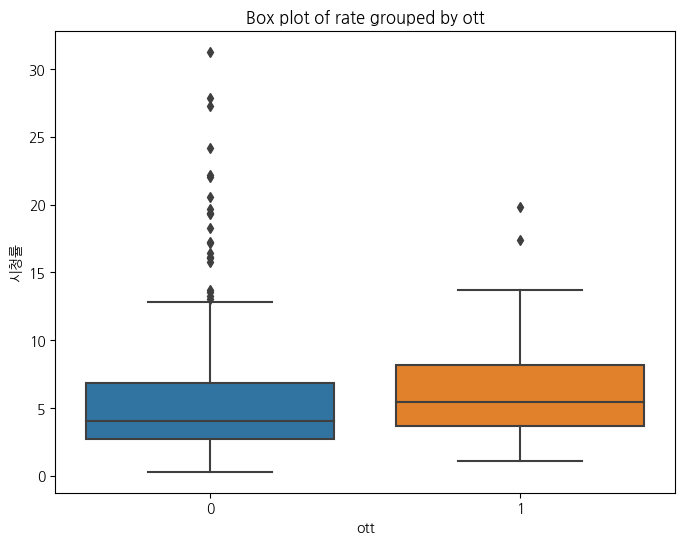

In [323]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='ott', y='시청률', data=table)
plt.title('Box plot of rate grouped by ott')
plt.show()

In [328]:
## 시청률의 경우 차이가 있는가? ##
x = table.loc[table['ott'] == 0, '시청률']
y = table.loc[table['ott'] == 1, '시청률']

# 시청률에 대한 정규성 검정
stat, p_value = shapiro(x)
print('Ott X 정규성 - Statistics=%.3f, p=%.3f' % (stat, p_value))

# searchs에 대한 정규성 검정
stat, p_value = shapiro(y)
print('Ott 정규성 - Statistics=%.3f, p=%.3f' % (stat, p_value))
### 두 경우 모두 정규성 만족 X ###

t_stat, p_val = ttest_ind(x, y)
print('t-statistic=%.3f, p-value=%.3f' % (t_stat, p_val))

stat, p = ranksums(x, y)

print('Wilcoxon Statistics=%.3f, p=%.3f' % (stat, p))
## ott 여부는 시청률에 영향을 주지 않는다. ##

Ott X 정규성 - Statistics=0.748, p=0.000
Ott 정규성 - Statistics=0.926, p=0.001
t-statistic=-0.961, p-value=0.337
Wilcoxon Statistics=-2.567, p=0.010


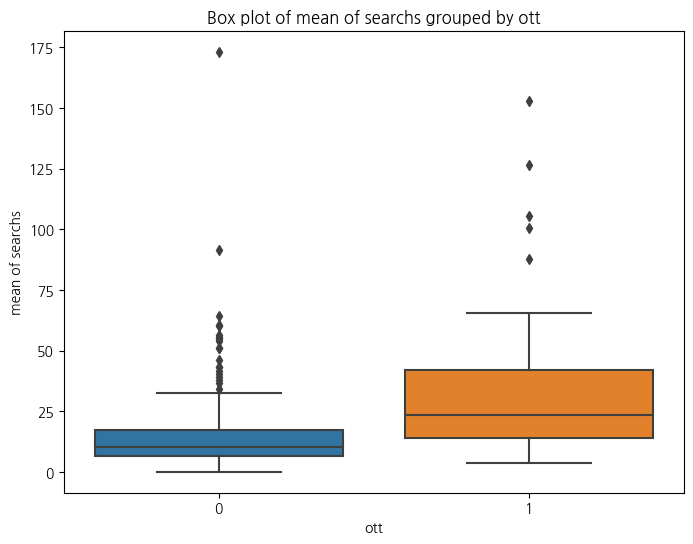

In [322]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='ott', y='mean of searchs', data=table)
plt.title('Box plot of mean of searchs grouped by ott')
plt.show()

In [329]:
## 일반 검색의 경우 차이가 있는가? ##
x = table.loc[table['ott'] == 0, 'mean of searchs']
y = table.loc[table['ott'] == 1, 'mean of searchs']

# 시청률에 대한 정규성 검정
stat, p_value = shapiro(x)
print('Ott X 정규성 - Statistics=%.3f, p=%.3f' % (stat, p_value))

# searchs에 대한 정규성 검정
stat, p_value = shapiro(y)
print('Ott 정규성 - Statistics=%.3f, p=%.3f' % (stat, p_value))
### 두 경우 모두 정규성 만족 X ###

t_stat, p_val = ttest_ind(x, y)
print('t-statistic=%.3f, p-value=%.3f' % (t_stat, p_val))

stat, p = ranksums(x, y)

print('Wilcoxon Statistics=%.3f, p=%.3f' % (stat, p))
## ott 여부는 일반 검색량에 영향을 준다. ##

Ott X 정규성 - Statistics=0.615, p=0.000
Ott 정규성 - Statistics=0.774, p=0.000
t-statistic=-6.112, p-value=0.000
Wilcoxon Statistics=-6.380, p=0.000


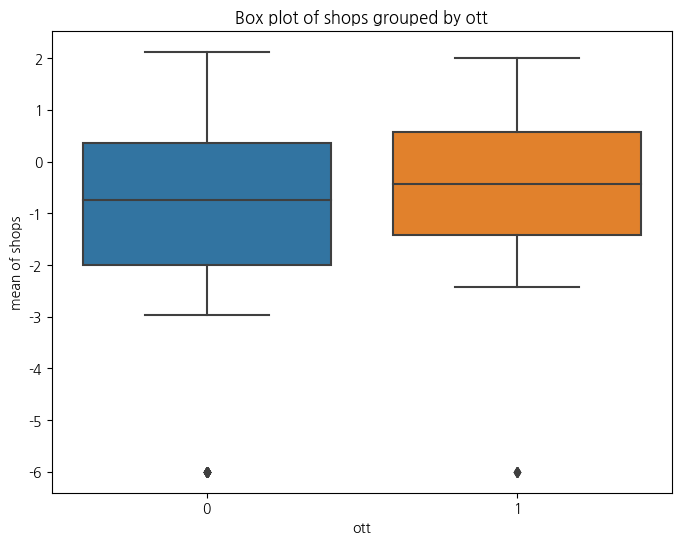

In [324]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='ott', y='mean of shops', data=table)
plt.title('Box plot of shops grouped by ott')
plt.show()

In [331]:
## 쇼핑 검색의 경우 차이가 있는가? ##
x = table.loc[table['ott'] == 0, 'mean of shops']
y = table.loc[table['ott'] == 1, 'mean of shops']

# 시청률에 대한 정규성 검정
stat, p_value = shapiro(x)
print('Ott X 정규성 - Statistics=%.3f, p=%.3f' % (stat, p_value))

# searchs에 대한 정규성 검정
stat, p_value = shapiro(y)
print('Ott 정규성 - Statistics=%.3f, p=%.3f' % (stat, p_value))
### 두 경우 모두 정규성 만족 X ###

t_stat, p_val = ttest_ind(x, y)
print('t-statistic=%.3f, p-value=%.3f' % (t_stat, p_val))

stat, p = ranksums(x, y)

print('Wilcoxon Statistics=%.3f, p=%.3f' % (stat, p))
## ott 여부는 쇼핑 검색량에 영향을 주지않는다. ##

Ott X 정규성 - Statistics=0.843, p=0.000
Ott 정규성 - Statistics=0.854, p=0.000
t-statistic=-1.786, p-value=0.075
Wilcoxon Statistics=-1.743, p=0.081


# 쇼핑 검색에 영향을 미치는 요인

# 종료